# case study 2.3
### Analysis of the hourly details of the users
* we have three hourly details of the users, hourly calories, hourly intensities, hourly steps

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/home/sunit.kapuria/data analyst course/case_study_2/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

In [5]:
df1=pd.read_csv("/home/sunit.kapuria/data analyst course/case_study_2/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

In [112]:
df2=pd.read_csv("/home/sunit.kapuria/data analyst course/case_study_2/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

In [138]:
df.head(24)

,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48
5,1503960366,2016-04-12 05:00:00,48
6,1503960366,2016-04-12 06:00:00,48
7,1503960366,2016-04-12 07:00:00,47
8,1503960366,2016-04-12 08:00:00,68
9,1503960366,2016-04-12 09:00:00,141


In [3]:
df['Id'].nunique()

33

* Hourly details of users are avilable for all 33 users

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [9]:
df1.head(2)

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333


In [10]:
df2.head(3)

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151


In [11]:
df['ActivityHour']=pd.to_datetime(df['ActivityHour'])
df1['ActivityHour']=pd.to_datetime(df1['ActivityHour'])
df2['ActivityHour']=pd.to_datetime(df2['ActivityHour'])

In [ ]:
# df.info()
# df1.info()
# df2.info()

In [ ]:
# df['Id'].count()
# df1['Id'].count()
# df2['Id'].count()
# All of them contains equal number of data

In [ ]:
# x=df['Id']-df1['Id']
# x.sum()
# x=df1['Id']-df2['Id']
# x.sum()

Since the Ids are number format, we can check the difference between the Ids of each dataframe to check if they are aligned to each other.
* from above experiment we can see that the Ids of each dataframes are alinged to each other

### lets merge the three dataframes column wise, so that we can have all the data in a single data frame

In [21]:
inner_join = pd.merge(df.drop('ActivityHour', axis=1),
                      df1.drop('ActivityHour', axis=1), 
                      on ='Id',
                      how='inner')

In [22]:
inner_join.head()

,Id,Calories,TotalIntensity,AverageIntensity
0,1503960366,81,20,0.333333
1,1503960366,81,8,0.133333
2,1503960366,81,7,0.116667
3,1503960366,81,0,0.000000
4,1503960366,81,0,0.000000


* as we can see here pd.merge is giving wrong values for calories, and the reason for this is there are repeated values of 
Id for each user. Therefore we will have to merge the data by simply concatenating. 
* another way we can apply is by first performing the aggregation and then merging using pd.merge
*Lets go with the send method

### Lets perform the aggregration and find out hourly calories burned for each user

In [24]:
df.head()

,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   Calories      22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [28]:
df_count=df.groupby('Id').count()['ActivityHour']

In [36]:
df_count
#The average count of each user is more or less same
df_count.mean()

669.6666666666666

In [32]:
df_new=df.groupby('Id').sum()['Calories']

In [33]:
calories_hr=df_new/df_count

In [116]:
calories=pd.Series(calories_hr, name='calories')
calories=calories.to_frame()

AttributeError: module 'pandas' has no attribute 'series'

In [105]:
type(calories)

pandas.core.frame.DataFrame

In [106]:
calories.reset_index(inplace=True)

In [107]:
calories.head()

,Id,calories
0,1503960366,78.503487
1,1624580081,62.472826
2,1644430081,118.820621
3,1844505072,66.595075
4,1927972279,91.504076


* This is the average hourly calories burned each user

### Lets perform the aggregration and find out hourly intensity of each user

In [37]:
df1.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.333333
1,1503960366,2016-04-12 01:00:00,8,0.133333
2,1503960366,2016-04-12 02:00:00,7,0.116667
3,1503960366,2016-04-12 03:00:00,0,0.000000
4,1503960366,2016-04-12 04:00:00,0,0.000000


* We are not droping the zero values in the intensities as it shows that the user was tracking his/her intensities during the
ideal periods as well, so we will include those values to calculate the average

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   TotalIntensity    22099 non-null  int64         
 3   AverageIntensity  22099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 690.7 KB


* in this df1, sum the total intensity and divide it with the total number of hours per users. 
* lets do both and cross check

In [52]:
df1_count=df1.groupby('Id').count()['ActivityHour']
df1_new=df1.groupby('Id').sum()['TotalIntensity']
intensities_hr=df1_new/df1_count
intensities_hr

Id
1503960366    16.170153
1624580081     8.039402
1644430081    10.519774
1844505072     5.021888
1927972279     1.857337
2022484408    17.031250
2026352035    10.812500
2320127002     8.742857
2347167796    14.521739
2873212765    15.101902
3372868164    15.379237
3977333714    15.228448
4020332650     4.357923
4057192912     4.897727
4319703577    11.310773
4388161847    14.311565
4445114986     9.793197
4558609924    14.449728
4702921684    12.931601
5553957443    12.843836
5577150313    19.895480
6117666160    12.540909
6290855005    10.600000
6775888955     4.373770
6962181067    14.875683
7007744171    17.580699
7086361926    13.563438
8053475328    17.949660
8253242879     9.106729
8378563200    14.858503
8583815059     9.130919
8792009665     4.434524
8877689391    19.081633
dtype: float64

In [53]:
df1_new1=df1.groupby('Id').sum()['AverageIntensity']
avg_intensities_hr=df1_new1/df1_count
avg_intensities_hr

Id
1503960366    0.269503
1624580081    0.133990
1644430081    0.175330
1844505072    0.083698
1927972279    0.030956
2022484408    0.283854
2026352035    0.180208
2320127002    0.145714
2347167796    0.242029
2873212765    0.251698
3372868164    0.256321
3977333714    0.253807
4020332650    0.072632
4057192912    0.081629
4319703577    0.188513
4388161847    0.238526
4445114986    0.163220
4558609924    0.240829
4702921684    0.215527
5553957443    0.214064
5577150313    0.331591
6117666160    0.209015
6290855005    0.176667
6775888955    0.072896
6962181067    0.247928
7007744171    0.293012
7086361926    0.226057
8053475328    0.299161
8253242879    0.151779
8378563200    0.247642
8583815059    0.152182
8792009665    0.073909
8877689391    0.318027
dtype: float64

In [70]:
new_df1=pd.concat([intensities_hr,avg_intensities_hr], axis=1)

In [72]:
new_df1.reset_index(inplace=True)

In [78]:
new_df1.rename(columns={'0':'Total_intensity_hr', '1':'avg_intensity_hr'}, inplace=True)

In [83]:
new_df1.columns=['Id','Total_intensity_hr', 'avg_intensity_hr']

In [99]:
new_df1.head()

,Id,Total_intensity_hr,avg_intensity_hr
0,1503960366,16.170153,0.269503
1,1624580081,8.039402,0.133990
2,1644430081,10.519774,0.175330
3,1844505072,5.021888,0.083698
4,1927972279,1.857337,0.030956


In [100]:
# new_df1.to_csv('/home/sunit.kapuria/data analyst course/case_study_2/details_hr')

### Lets join the agregrated information form the average intensity and average calories infomation

In [108]:
inner_join = pd.merge(new_df1,
                      calories, 
                      on ='Id',
                      how='inner')

In [110]:
inner_join.columns=['Id','Total_intensity_hr', 'avg_intensity_hr', 'Calories_hr']

In [111]:
inner_join.head()

,Id,Total_intensity_hr,avg_intensity_hr,Calories_hr
0,1503960366,16.170153,0.269503,78.503487
1,1624580081,8.039402,0.133990,62.472826
2,1644430081,10.519774,0.175330,118.820621
3,1844505072,5.021888,0.083698,66.595075
4,1927972279,1.857337,0.030956,91.504076


### Lets perform the same process for hourly steps caculation

In [113]:
df2.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [117]:
df2['ActivityHour']=pd.to_datetime(df2['ActivityHour'])

In [118]:
df2_count=df2.groupby('Id').count()['ActivityHour']

In [119]:
df22_new=df2.groupby('Id').sum()['StepTotal']

In [120]:
steps_hr=df22_new/df2_count

In [121]:
steps_hr=pd.Series(steps_hr, name='steps_hr')
steps_hr=steps_hr.to_frame()

In [122]:
steps_hr.reset_index(inplace=True)

In [123]:
steps_hr.head()

,Id,steps_hr
0,1503960366,522.379358
1,1624580081,241.508152
2,1644430081,307.806497
3,1844505072,109.359781
4,1927972279,38.586957


Lets merge it with the previous newly merged dataframe

In [124]:
final_join = pd.merge(inner_join,
                      steps_hr, 
                      on ='Id',
                      how='inner')

In [125]:
final_join.head()

,Id,Total_intensity_hr,avg_intensity_hr,Calories_hr,steps_hr
0,1503960366,16.170153,0.269503,78.503487,522.379358
1,1624580081,8.039402,0.133990,62.472826,241.508152
2,1644430081,10.519774,0.175330,118.820621,307.806497
3,1844505072,5.021888,0.083698,66.595075,109.359781
4,1927972279,1.857337,0.030956,91.504076,38.586957


* Lets now check the visualize the relation between each of the features

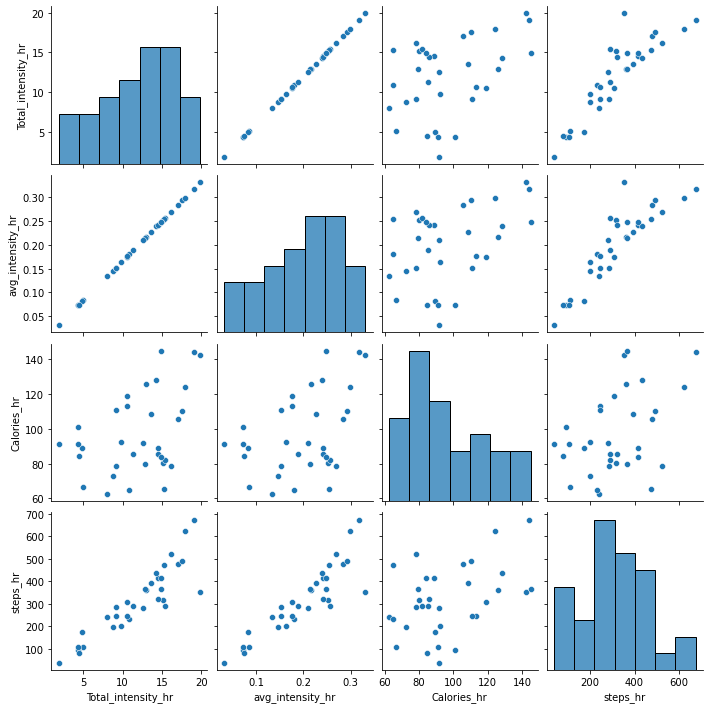

In [126]:
sns.pairplot(final_join.iloc[:,1:])

#### It is quite visible that average intensity and total intensity are completely correlated to each other so we will drop average intensity here. 
* Lets find the correlation value between intenisty and calorie burned and also steps per hr

In [127]:
final_join.drop('avg_intensity_hr', axis=1, inplace=True)

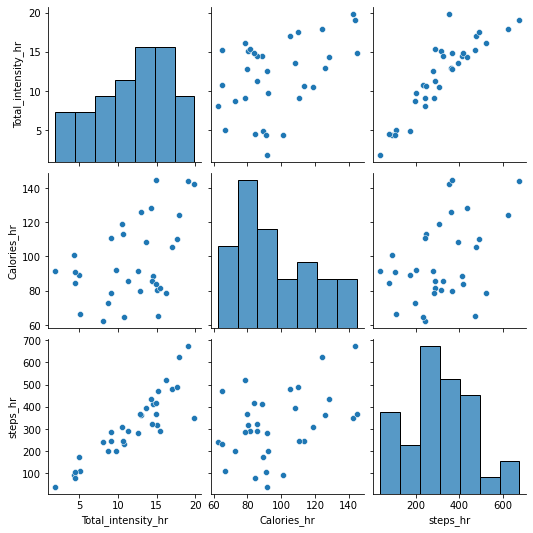

In [128]:
sns.pairplot(final_join.iloc[:,1:])

In [129]:
import statistics
from scipy.stats import pearsonr

In [130]:
list1 = final_join['Total_intensity_hr']
list2 = final_join['Calories_hr']

# Calculating pearson correlation
corr, _ = pearsonr(list1, list2)
print('%.3f' % corr)
print('\n\n')

0.422





In [131]:
list1 = final_join['Total_intensity_hr']
list2 = final_join['steps_hr']

# Calculating pearson correlation
corr, _ = pearsonr(list1, list2)
print('%.3f' % corr)
print('\n\n')

0.898





In [132]:
list1 = final_join['Calories_hr']
list2 = final_join['steps_hr']

# Calculating pearson correlation
corr, _ = pearsonr(list1, list2)
print('%.3f' % corr)
print('\n\n')

0.414





* this shows that while all three of these variables are positively correlated, there is maximum correlation between Total intensity and total steps per hour, while calories per hour is only 44% correlated to both of them.

Let us save the new dataframe as hourly_info

In [134]:
final_join.to_csv('/home/sunit.kapuria/data analyst course/case_study_2/hourly_info.csv')

## we can further check the slope of fitted line between any of these two variables